In [ ]:
import pandas as pd #Libreria para hacer todo el analisis de datos.
from google.colab import drive #Libreria para poder gesionar datasets cuyo origen es google drive
import matplotlib.pyplot as plt #Libreria para poder graficar los datos obtenidos.
import seaborn as sns #Libreria para graficas mas avanzadas y funcionamiento mas sencillo que matplotlib.
#from google.colab import files #Libreria para poder exportar los dataset generados, CSV o XMLS.
import folium #Libreria para graficar mapas
from folium.plugins import HeatMap #Libreria para graficar mapas x2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#drive.mount('/content/drive')
ruta = "https://raw.githubusercontent.com/Redison23/IA_MINTIC/main/DataSets1/consumo_generacion_energia_colombia_corregido.csv"
ruta2 = "https://raw.githubusercontent.com/Redison23/IA_MINTIC/main/DataSets1/departamentos.xlsx"
ruta3 = "https://raw.githubusercontent.com/Redison23/IA_MINTIC/main/DataSets1/ubicacion.csv"
df = pd.read_csv(ruta)
df = df.drop_duplicates()
# df.info()
departamentos = pd.read_excel(ruta2)
# departamentos.info()
ubicaciones = pd.read_csv(ruta3)
# ubicaciones.info()
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas

In [ ]:
# Fusionar ambos datasets con base a 'ID DEPARTAMENTO'
df = df.merge(departamentos, on="ID DEPARTAMENTO", suffixes=('_old', ''))
# Reemplazar los valores antiguos por los nuevos
df["DEPARTAMENTO"] = df["DEPARTAMENTO"]
df["ID DEPARTAMENTO"] = df["ID DEPARTAMENTO"]
# Eliminar las columnas antiguas si es necesario
df.drop(columns=["DEPARTAMENTO_old"], inplace=True)
# Verificar cambios
# df.info()
# df.head()

In [ ]:
# Fusionar ambos datasets en base a 'ID MUNICIPIO'
df = df.merge(ubicaciones, on="ID MUNICIPIO", suffixes=('_old', ''))

# Reemplazar los valores antiguos por los nuevos
df["ID MUNICIPIO"] = df["ID MUNICIPIO"]
df["LATITUD"] = df["LATITUD"]
df["LONGITUD"] = df["LONGITUD"]

# Eliminar las columnas antiguas si es necesario
df.drop(columns=["Unnamed: 0", "LATITUD_old", "LONGITUD_old"], inplace=True)

# Verificar cambios
# print(df.info())
# df.head(50)
# df.to_csv("dataset.csv", index=False)

# **Eliminar columnas**

In [ ]:
df.drop(columns=["Térmica - Gas", "Térmica - Carbón", "Térmica - Diésel", "Biomasa",
                 "GENERACIÓN TOTAL", "CONSUMO TOTAL", "POBLACIÓN RURAL", "POBLACIÓN URBANA"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3987 entries, 0 to 3986
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID DEPARTAMENTO       3987 non-null   int64  
 1   ID MUNICIPIO          3987 non-null   int64  
 2   AÑO                   3987 non-null   int64  
 3   CONSUMO RESIDENCIAL   3987 non-null   int64  
 4   CONSUMO INDUSTRIAL    3987 non-null   int64  
 5   CONSUMO COMERCIAL     3987 non-null   int64  
 6   CONSUMO PUBLICO       3987 non-null   int64  
 7   ENERGÍA ACTIVA        3987 non-null   float64
 8   ENERGÍA REACTIVA      3987 non-null   float64
 9   POTENCIA MÁXIMA       3987 non-null   int64  
 10  TEMP MÁX (°C)         3987 non-null   float64
 11  TEMP MÍN (°C)         3987 non-null   float64
 12  PRECIPITACIONES (mm)  3987 non-null   float64
 13  VIENTO (m/s)          3987 non-null   float64
 14  NIVEL EMBALSES (%)    3987 non-null   float64
 15  POBLACIÓN            

In [ ]:
df.head()

,ID DEPARTAMENTO,ID MUNICIPIO,AÑO,CONSUMO RESIDENCIAL,CONSUMO INDUSTRIAL,CONSUMO COMERCIAL,CONSUMO PUBLICO,ENERGÍA ACTIVA,ENERGÍA REACTIVA,POTENCIA MÁXIMA,TEMP MÁX (°C),TEMP MÍN (°C),PRECIPITACIONES (mm),VIENTO (m/s),NIVEL EMBALSES (%),POBLACIÓN,Hidráulica,Solar,Eólica,MUNICIPIO,DEPARTAMENTO,REGIÓN,ID_REGIÓN,LATITUD,LONGITUD
0,5,5001,2020,64494,163686,55258,35425,303577.625068,47795.977036,7563,33.771039,19.293450,544.469915,4.055194,99.563884,207975,200387,19891,8179,MEDELLÍN,ANTIOQUIA,Andina,1,6.257590,-75.611031
1,5,5002,2020,64132,120997,48729,21095,301564.497076,60417.964422,6741,38.350447,24.339592,2979.805605,6.796211,25.081380,1021902,45757,28218,6772,ABEJORRAL,ANTIOQUIA,Andina,1,5.803728,-75.438474
2,5,5004,2020,89035,86513,4832,31898,195535.876190,25751.309001,6485,27.826972,14.508415,2405.911669,14.602067,88.669561,567647,53060,15244,5711,ABRIAQUÍ,ANTIOQUIA,Andina,1,6.627569,-76.085978
3,8,8001,2020,31771,197608,77544,47762,395621.536312,77076.142575,3424,37.734830,19.647962,570.462530,4.086815,45.038396,1816302,96752,14450,9447,BARRANQUILLA,ATLANTICO,Caribe,2,10.981521,-74.827715
4,13,13001,2020,28689,118979,29654,9210,177813.684699,25280.676814,3406,35.960062,16.955897,3648.873872,2.980516,23.120443,1405566,90267,4315,10380,CARTAGENA DE INDIAS,BOLIVAR,Caribe,2,10.463434,-75.458899


# **FIltrar datos y asignar**

In [ ]:
print("La temperatura maxima registrada es: ",df["TEMP MÁX (°C)"].max(), "°C")
print("El nivel de embalses maximo registrado es: ",df["NIVEL EMBALSES (%)"].max()," %")
print("El nivel maximo de precipitaciones es: ",df["PRECIPITACIONES (mm)"].min()," mm")
# Aplicar filtro para municipios fuera del rango de temperatura entre 21°C y 26°C y energia eolica entre 16m/s y 20m/s
filtroSolar = (df["TEMP MÁX (°C)"] < 21.0) & (df["TEMP MÁX (°C)"] > 26.0)
filtroEolica = (df["VIENTO (m/s)"] < 16.0) & (df["VIENTO (m/s)"] > 20.0)
filtroHidraulica = (df["PRECIPITACIONES (mm)"] < 2000.0) | (df["NIVEL EMBALSES (%)"] < 50.0) & (df["TEMP MÁX (°C)"] > 25.0)
df.loc[filtroSolar, ["Solar"]] = 0
df.loc[filtroEolica, ["Eólica"]] = 0
df.loc[filtroHidraulica, ["Hidráulica"]] = 0
# df[df["Hidráulica"] > 0]

df["GENERACIÓN_TOTAL"] = df["Hidráulica"] + df["Solar"] + df["Eólica"]
EnergiaTotalGenerada = df["GENERACIÓN_TOTAL"].sum()
print("El total de energia en todos los años de registros es: ",EnergiaTotalGenerada /1000000," Gwh")
# df.head(50)


La temperatura maxima registrada es:  41.99678290793909 °C
El nivel de embalses maximo registrado es:  99.98801777906436  %
El nivel maximo de precipitaciones es:  200.1697285336384  mm
El total de energia en todos los años de registros es:  550.904336  Gwh


# **Generacion Y Consumo De Energia**

https://www.xm.com.co/noticias/7504-en-2024-la-demanda-de-energia-en-colombia-aumento-23-en-comparacion-con-el-ano#:~:text=En%202024%20la%20demanda%20de%20energ%C3%ADa%20fue%20de%2082%2C084.9%20GWh,demanda%20fue%20de%2079%2C982.1%20GWh.

https://www.larepublica.co/globoeconomia/colombia-recibira-casi-us-100-millones-por-venta-de-energia-a-ecuador-en-diciembre-4016712

In [ ]:
# generacion
generacion = df.groupby("AÑO")["GENERACIÓN_TOTAL"].sum().reset_index()
generacion.GENERACIÓN_TOTAL = generacion.GENERACIÓN_TOTAL / 1000000
# print(consumo)
for i, j in zip(generacion.AÑO, generacion.GENERACIÓN_TOTAL):
  print(f"La generacion para el Año: {i} fue de: {j} Gwh")

# Consumo

df[["CONSUMO COMERCIAL", "CONSUMO RESIDENCIAL", "CONSUMO INDUSTRIAL", "CONSUMO PUBLICO","ENERGÍA ACTIVA","ENERGÍA REACTIVA","POTENCIA MÁXIMA"]] *= 0.5
df["CONSUMO_TOTAL"] = df["CONSUMO RESIDENCIAL"] + df["CONSUMO INDUSTRIAL"] + df["CONSUMO COMERCIAL"] + df["CONSUMO PUBLICO"]
# print("El consumo total en todos los años es: ",df['CONSUMO_TOTAL'].sum())
#Agrupar para ver datos
print("---------------------------------------------------------------")
consumo = df.groupby("AÑO")["CONSUMO_TOTAL"].sum().reset_index()
consumo.CONSUMO_TOTAL = consumo.CONSUMO_TOTAL / 1000000
for i, j in zip(consumo.AÑO, consumo.CONSUMO_TOTAL):
  print(f"El consumo para el Año: {i} fue de: {j} Gwh")

# Poblacion
poblacion = df["POBLACIÓN"].sum()
# print("La poblacion de total es: ",int(poblacion)," millones de personas")

df["POBLACIÓN"] = (df["POBLACIÓN"]*1/2)*1/8 #Se multiplica por 1/2 o 0.5 y luego por 1/8 o 0.125
# df["POBLACIÓN RURAL"] = df["POBLACIÓN RURAL"]/2
# df["POBLACIÓN URBANA"] = df["POBLACIÓN URBANA"]/2
# df.head(10)
reduccion = 0.92  # 92% del valor original
reduccion2 = 0.95  # 95% del valor original
# Aplicar reducción solo a los años 2022 y 2023
df.loc[df["AÑO"].isin([2022]), "POBLACIÓN"] *= reduccion
df.loc[df["AÑO"].isin([2023]), "POBLACIÓN"] *= reduccion2
poblacion = df.groupby("AÑO")["POBLACIÓN"].sum().reset_index()
print("--------------------------------------------------------------")
for i, j in zip(poblacion.AÑO, poblacion.POBLACIÓN):
  print(f"La población para el Año: {i} fue de: {int(j)/1000000} personas")
print("\n")



La generacion para el Año: 2020 fue de: 109.941903 Gwh
La generacion para el Año: 2021 fue de: 102.64726 Gwh
La generacion para el Año: 2022 fue de: 111.721727 Gwh
La generacion para el Año: 2023 fue de: 111.901521 Gwh
La generacion para el Año: 2024 fue de: 114.691925 Gwh
---------------------------------------------------------------
El consumo para el Año: 2020 fue de: 89.636353 Gwh
El consumo para el Año: 2021 fue de: 84.879852 Gwh
El consumo para el Año: 2022 fue de: 90.437224 Gwh
El consumo para el Año: 2023 fue de: 89.987513 Gwh
El consumo para el Año: 2024 fue de: 90.108737 Gwh
--------------------------------------------------------------
La población para el Año: 2020 fue de: 48.176446 personas
La población para el Año: 2021 fue de: 48.691707 personas
La población para el Año: 2022 fue de: 48.552545 personas
La población para el Año: 2023 fue de: 48.831649 personas
La población para el Año: 2024 fue de: 50.981123 personas




# **Grafico General**

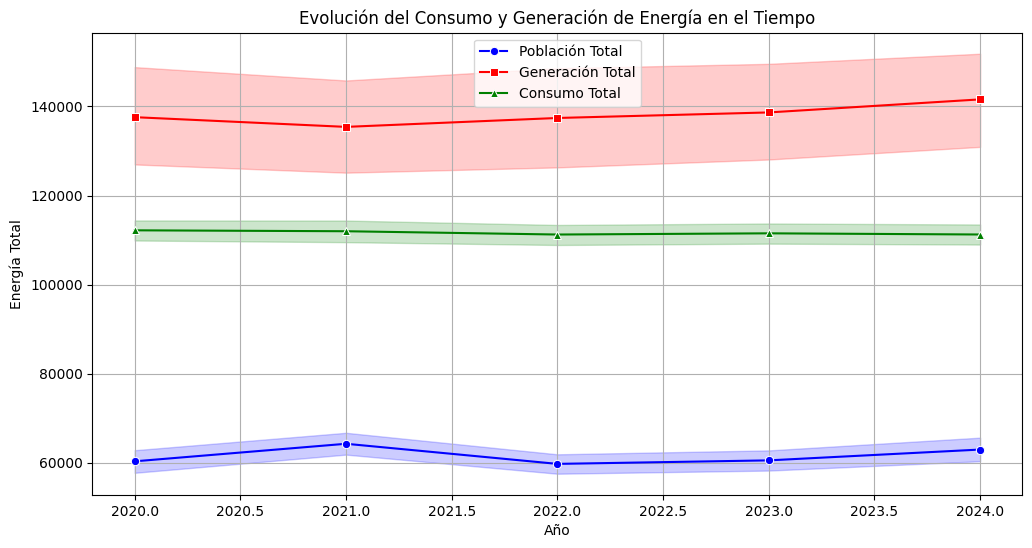

In [ ]:
# Gráfico de líneas
plt.figure(figsize=(12, 6))
sns.lineplot(x=df["AÑO"], y=df["POBLACIÓN"], label="Población Total", marker="o", color="blue")
sns.lineplot(x=df["AÑO"], y=df["GENERACIÓN_TOTAL"], label="Generación Total", marker="s", color="red")
sns.lineplot(x=df["AÑO"], y=df["CONSUMO_TOTAL"], label="Consumo Total", marker="^", color="green")
plt.title("Evolución del Consumo y Generación de Energía en el Tiempo")
plt.xlabel("Año")
plt.ylabel("Energía Total")
plt.legend()
plt.grid(True)
plt.show()

# **Consumo y Generación Promedio**


In [ ]:
print(f"El consumo residencial promedio es: {df['CONSUMO RESIDENCIAL'].mean():.2f} en Kwh, el maximo es {df['CONSUMO RESIDENCIAL'].max():.2f} en Kwh y el minimo es: {df['CONSUMO RESIDENCIAL'].min():.2f} en Kwh")
print(f"El consumo industrial promedio es: {df['CONSUMO INDUSTRIAL'].mean():.2f} en Kwh, el maximo es {df['CONSUMO INDUSTRIAL'].max():.2f} en Kwh y el minimo es: {df['CONSUMO INDUSTRIAL'].min():.2f} en Kwh")
print(f"El consumo comercial promedio es: {df['CONSUMO COMERCIAL'].mean():.2f} en Kwh, el maximo es {df['CONSUMO COMERCIAL'].max():.2f} en Kwh y el minimo es: {df['CONSUMO COMERCIAL'].min():.2f} en Kwh")
print(f"El consumo publico promedio es: {df['CONSUMO PUBLICO'].mean():.2f} en Kwh, el maximo es {df['CONSUMO PUBLICO'].max():.2f} en Kwh y el minimo es: {df['CONSUMO PUBLICO'].min():.2f} en Kwh")
print(f"El consumo total es: {df['CONSUMO_TOTAL'].mean():.2f} en Kwh")
print("---------------------------------------------------------------")
print(f"la generación hidraulica promedio es: {df['Hidráulica'].mean():.2f} en Kwh, el maximo es {df['Hidráulica'].max():.2f} en Kwh y el minimo es: {df['Hidráulica'].min():.2f} en Kwh")
print(f"la generación solar promedio es: {df['Solar'].mean():.2f} en Kwh, el maximo es {df['Solar'].max():.2f} en Kwh y el minimo es: {df['Solar'].min():.2f} en Kwh")
print(f"la generación eolica promedio es: {df['Eólica'].mean():.2f} en Kwh, el maximo es {df['Eólica'].max():.2f} en Kwh y el minimo es: {df['Eólica'].min():.2f} en Kwh")
print(f"la generación total es: {df['GENERACIÓN_TOTAL'].mean():.2f} en Kwh")


El consumo residencial promedio es: 26019.06 en Kwh, el maximo es 50000.00 en Kwh y el minimo es: 2511.00 en Kwh
El consumo industrial promedio es: 52224.67 en Kwh, el maximo es 99993.50 en Kwh y el minimo es: 5020.00 en Kwh
El consumo comercial promedio es: 20480.03 en Kwh, el maximo es 39998.00 en Kwh y el minimo es: 1012.00 en Kwh
El consumo publico promedio es: 12901.44 en Kwh, el maximo es 24998.50 en Kwh y el minimo es: 518.50 en Kwh
El consumo total es: 111625.20 en Kwh
---------------------------------------------------------------
la generación hidraulica promedio es: 112704.18 en Kwh, el maximo es 499895.00 en Kwh y el minimo es: 0.00 en Kwh
la generación solar promedio es: 15355.95 en Kwh, el maximo es 29997.00 en Kwh y el minimo es: 506.00 en Kwh
la generación eolica promedio es: 10115.02 en Kwh, el maximo es 19997.00 en Kwh y el minimo es: 300.00 en Kwh
la generación total es: 138175.15 en Kwh


# MAPA DE CALOR DE CONSUMO POR MUNICIPIO

In [ ]:

# Convertir a tipo float para asegurarnos de que los datos son correctos
df["LATITUD"] = pd.to_numeric(df["LATITUD"], errors="coerce")
df["LONGITUD"] = pd.to_numeric(df["LONGITUD"], errors="coerce")
# Filtrar filas con datos válidos de latitud y longitud
df_map = df.dropna(subset=["LATITUD", "LONGITUD", "GENERACIÓN_TOTAL"])
# Crear un mapa con Folium
m = folium.Map(location=[df_map["LATITUD"].mean(), df_map["LONGITUD"].mean()], zoom_start=6)
# Agregar un mapa de calor basado en el consumo total
heat_data = list(zip(df_map["LATITUD"], df_map["LONGITUD"], df_map["CONSUMO_TOTAL"]))
HeatMap(heat_data).add_to(m)
# ---- Agregar leyenda personalizada ----
legend_html = '''
<div style="position: fixed; top: 90px; left: 12px; width: 180px; height: 180px;
            background-color: white; z-index:9999; font-size:14px; padding:10px;
            border-radius: 8px; box-shadow: 2px 2px 5px rgba(0,0,0,0.3);">
    <b>Densidad de Consumo Electrico</b><br>
    <i style="background: #ff0000; width: 18px; height: 18px; display: inline-block;"></i> Alta<br>
    <i style="background: #ffa500; width: 18px; height: 18px; display: inline-block;"></i> Media-Alta<br>
    <i style="background: #ffff00; width: 18px; height: 18px; display: inline-block;"></i> Media<br>
    <i style="background: #00ff00; width: 18px; height: 18px; display: inline-block;"></i> Baja<br>
    <i style="background: #0000ff; width: 18px; height: 18px; display: inline-block;"></i> Muy Baja
</div>
'''

m.get_root().html.add_child(folium.Element(legend_html))
# Guardar y mostrar el mapa interactivo
m.save("mapa_calor_consumo.html")
from IPython.display import display
display(m)

In [ ]:
# from branca.element import Template, MacroElement

df["LATITUD"] = pd.to_numeric(df["LATITUD"], errors="coerce")
df["LONGITUD"] = pd.to_numeric(df["LONGITUD"], errors="coerce")
df["POBLACIÓN"] = pd.to_numeric(df["POBLACIÓN"], errors="coerce")

df_map = df.dropna(subset=["LATITUD", "LONGITUD", "POBLACIÓN"])
# Crear el mapa centrado en la media de las coordenadas
m = folium.Map(location=[df_map["LATITUD"].mean(), df_map["LONGITUD"].mean()], zoom_start=6)

# Agregar el mapa de calor basado en población
heat_data = list(zip(df_map["LATITUD"], df_map["LONGITUD"], df_map["POBLACIÓN"]))
HeatMap(heat_data, radius=15).add_to(m)


# ---- Agregar leyenda personalizada ----
legend_html = '''
<div style="position: fixed; top: 90px; left: 12px; width: 180px; height: 180px;
            background-color: white; z-index:9999; font-size:14px; padding:10px;
            border-radius: 8px; box-shadow: 2px 2px 5px rgba(0,0,0,0.3);">
    <b>Densidad de Población</b><br>
    <i style="background: #ff0000; width: 18px; height: 18px; display: inline-block;"></i> Alta<br>
    <i style="background: #ffa500; width: 18px; height: 18px; display: inline-block;"></i> Media-Alta<br>
    <i style="background: #ffff00; width: 18px; height: 18px; display: inline-block;"></i> Media<br>
    <i style="background: #00ff00; width: 18px; height: 18px; display: inline-block;"></i> Baja<br>
    <i style="background: #0000ff; width: 18px; height: 18px; display: inline-block;"></i> Muy Baja
</div>
'''

m.get_root().html.add_child(folium.Element(legend_html))


# Guardar y mostrar el mapa
m.save("mapa_calor_densidad_poblacion.html")
from IPython.display import display
display(m)

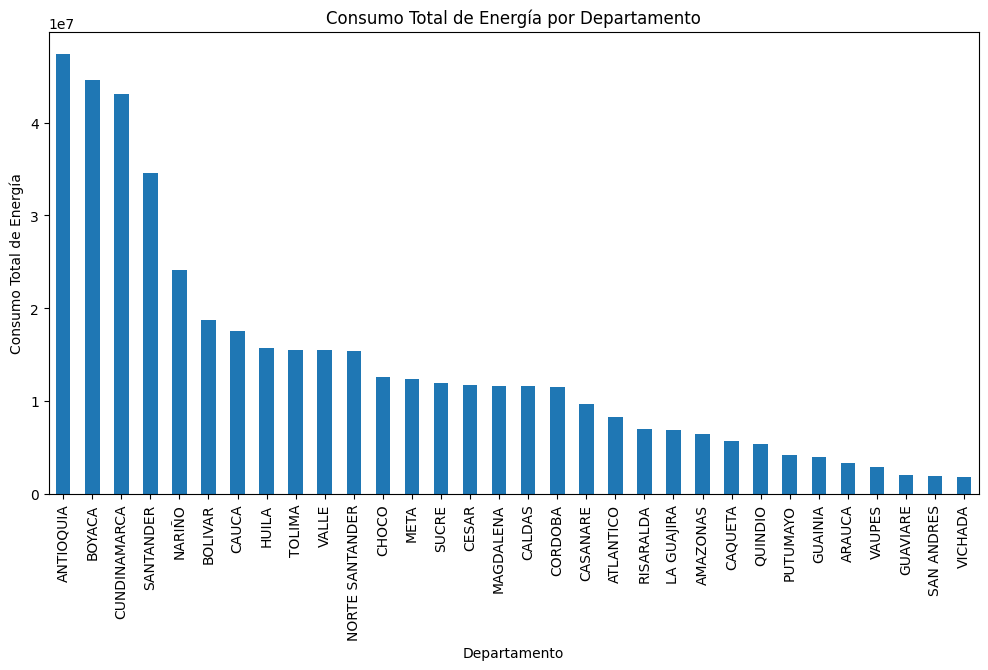

In [ ]:
# --- 4. GRÁFICO DE BARRAS POR DEPARTAMENTO ---
plt.figure(figsize=(12, 6))
df_dept = df.groupby("DEPARTAMENTO")["CONSUMO_TOTAL"].sum().sort_values(ascending=False)
df_dept.plot(kind="bar")
plt.title("Consumo Total de Energía por Departamento")
plt.xlabel("Departamento")
plt.ylabel("Consumo Total de Energía")
plt.xticks(rotation=90)
plt.show()

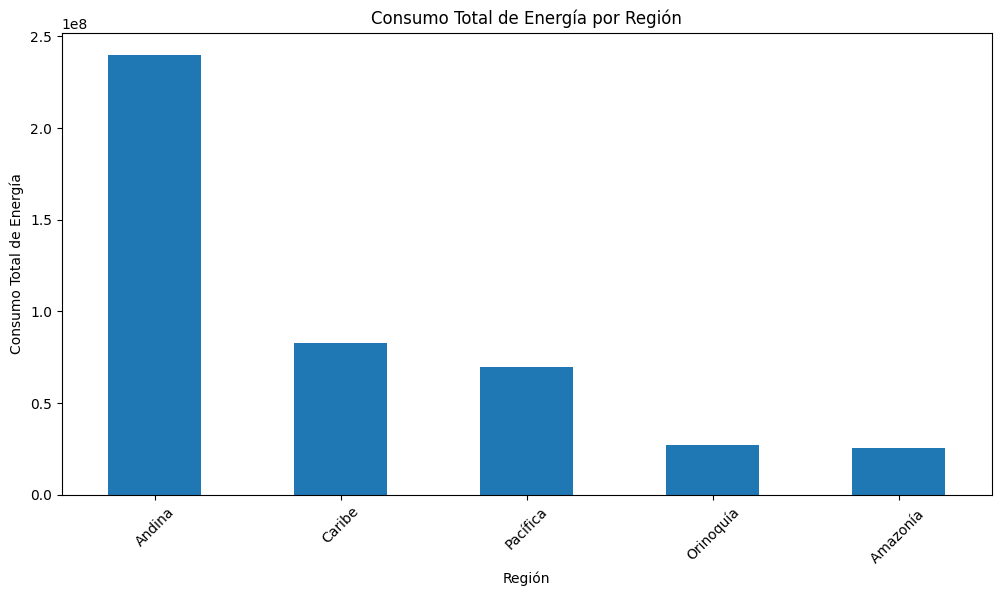

In [ ]:
# GRÁFICO DE BARRAS POR REGIÖN ---
plt.figure(figsize=(12, 6))
df_dept = df.groupby("REGIÓN")["CONSUMO_TOTAL"].sum().sort_values(ascending=False)
df_dept.plot(kind="bar")
plt.title("Consumo Total de Energía por Región")
plt.xlabel("Región")
plt.ylabel("Consumo Total de Energía")
plt.xticks(rotation=45)
plt.show()

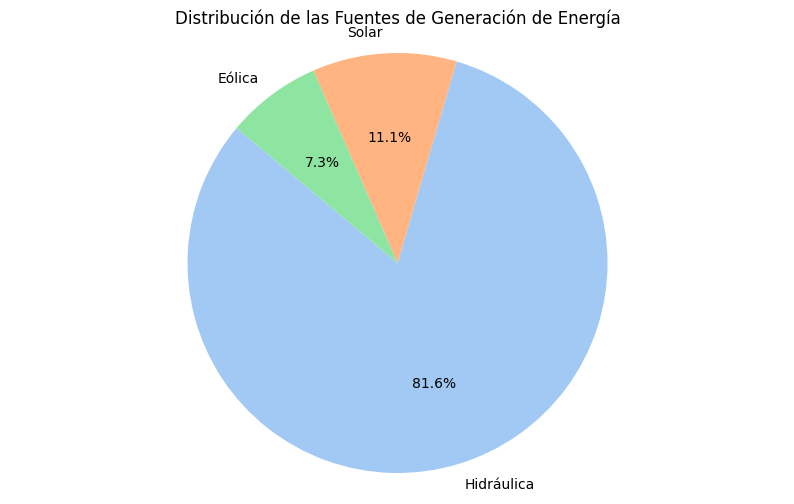

In [ ]:
# --- 5. GRÁFICO DE TORTA PARA FUENTES DE GENERACIÓN ---
fuentes = ["Hidráulica", "Solar", "Eólica"]
df_fuentes = df[fuentes].sum()

plt.figure(figsize=(10, 6))
plt.pie(df_fuentes, labels=fuentes, autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=140)
plt.title("Distribución de las Fuentes de Generación de Energía")
plt.axis("equal")  # Para que sea un círculo
plt.show()

# **Modelos**

# **Regresión Lineal**

Primer modelo: Regresión lineal numero 1: erronea.

In [ ]:
#La Regresión Lineal Múltiple es un modelo matemático que busca predecir una variable (y) en
# función de varias variables (X). En este caso la variable Y es Consumo Total

# Selección las características relevantes
Caracteristicas = [
    "TEMP MÁX (°C)", "TEMP MÍN (°C)", "PRECIPITACIONES (mm)", "VIENTO (m/s)", "NIVEL EMBALSES (%)",
    "GENERACIÓN_TOTAL", "POBLACIÓN"
]

# Definir variables predictoras y objetivo
X  = df[Caracteristicas].dropna()  # Eliminamos filas con valores NaN
y = df.loc[X.index, "CONSUMO_TOTAL"]

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de regresión lineal mejorado
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones
y_pred1 = modelo.predict(X_test)

# Evaluación del nuevo modelo
MSE = mean_squared_error(y_test1, y_pred1)
R2 = r2_score(y_test1, y_pred1)

print(f"El error cuadratico medio es: {MSE}, Y el coeficiente de determinación {R2}")


El error cuadratico medio es: 1175304027.4336631, Y el coeficiente de determinación -0.0018987307789157803


# **Grafica correlación**

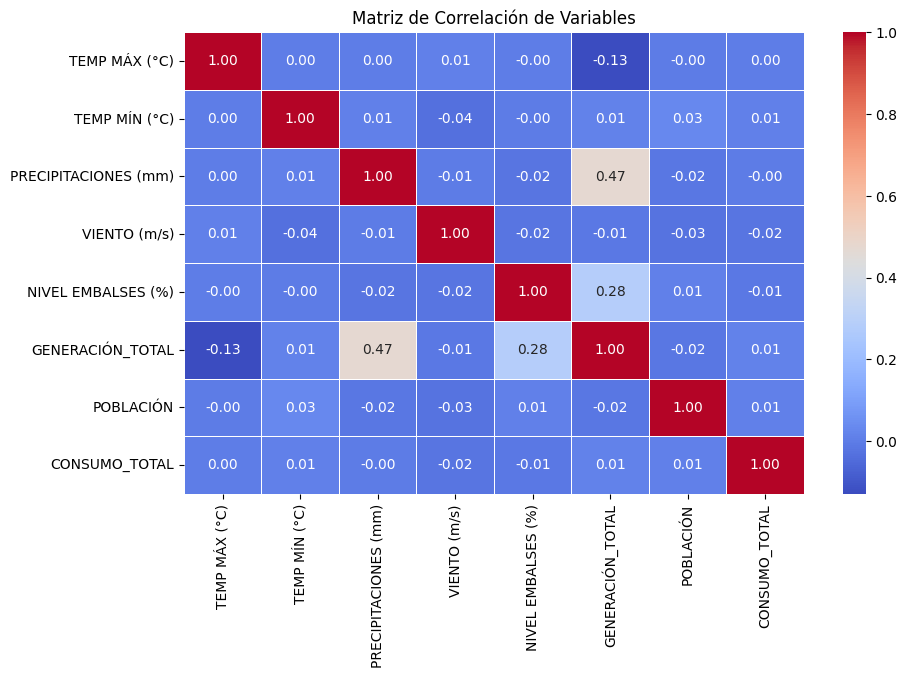

,CONSUMO_TOTAL
CONSUMO_TOTAL,1.000000
GENERACIÓN_TOTAL,0.014463
POBLACIÓN,0.011382
TEMP MÍN (°C),0.010968
TEMP MÁX (°C),0.000777
PRECIPITACIONES (mm),-0.003447
NIVEL EMBALSES (%),-0.013810
VIENTO (m/s),-0.023005


In [ ]:
# Calcular la matriz de correlación
correlacion = df[Caracteristicas + ["CONSUMO_TOTAL"]].corr()

# Graficar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación de Variables")
plt.show()

correlacion["CONSUMO_TOTAL"].sort_values(ascending=False)

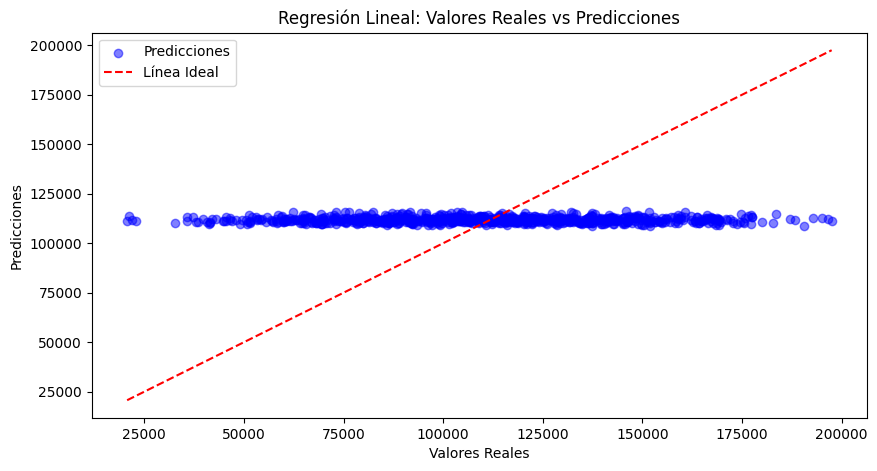

In [ ]:
# Graficar resultados de la regresión lineal
plt.figure(figsize=(10, 5))
plt.scatter(y_test1, y_pred1, alpha=0.5, color='blue', label="Predicciones")
plt.plot([y_test1.min(), y_test1.max()], [y_test1.min(), y_test1.max()], '--', color='red', label="Línea Ideal")
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Valores Reales vs Predicciones")
plt.legend()
plt.show()



# **Regresion lineal numero 2.**

In [ ]:
# Selección de características para regresión lineal
features = ["CONSUMO RESIDENCIAL", "CONSUMO INDUSTRIAL", "CONSUMO COMERCIAL", "CONSUMO PUBLICO"]
target = "CONSUMO_TOTAL"

X = df[features]
y = df[target]

#X contiene las columnas que se usarán como variables predictoras.
#y es la variable objetivo que queremos predecir (consumo total de energía)

X_train, X_test, y_train, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

#El dataset se divide en 80% para entrenamiento y 20% para prueba.
#random_state=42 asegura que los datos se dividan de la misma manera cada vez que ejecutemos el código.

model = LinearRegression()
model.fit(X_train, y_train)

#Se crea una instancia del modelo LinearRegression().
#Se entrena con los datos de entrenamiento usando fit().

y_pred2 = model.predict(X_test)

MSE = mean_squared_error(y_test2, y_pred2)
R2 = r2_score(y_test2, y_pred2)
print(f"El error cuadratico medio es: {MSE}, Y el coeficiente de determinación {R2}")

#predict(X_test) usa el modelo entrenado para hacer predicciones en los datos de prueba.
#Error Cuadrático Medio (MSE): mide cuánto se alejan las predicciones de los valores reales.
#Coeficiente de determinación (R²): indica qué tan bien el modelo explica la variabilidad de los datos (cercano a 1 es mejor).

El error cuadratico medio es: 9.22727229273188e-22, Y el coeficiente de determinación 1.0


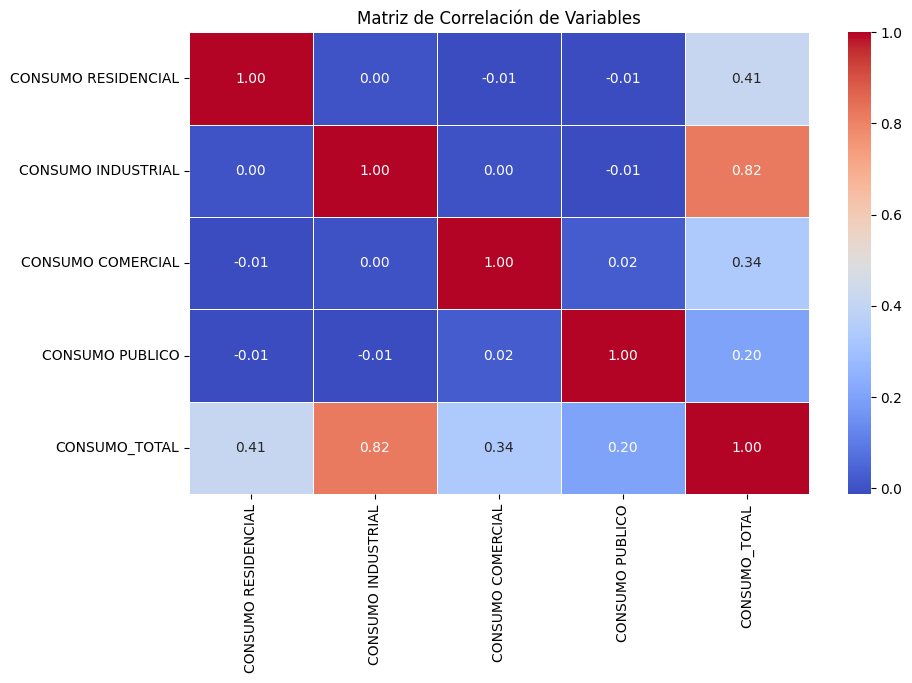

,CONSUMO_TOTAL
CONSUMO_TOTAL,1.000000
CONSUMO INDUSTRIAL,0.820042
CONSUMO RESIDENCIAL,0.410842
CONSUMO COMERCIAL,0.336930
CONSUMO PUBLICO,0.204210


In [ ]:
# Calcular la matriz de correlación
correlacion = df[features + ["CONSUMO_TOTAL"]].corr()

# Graficar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación de Variables")
plt.show()

correlacion["CONSUMO_TOTAL"].sort_values(ascending=False)

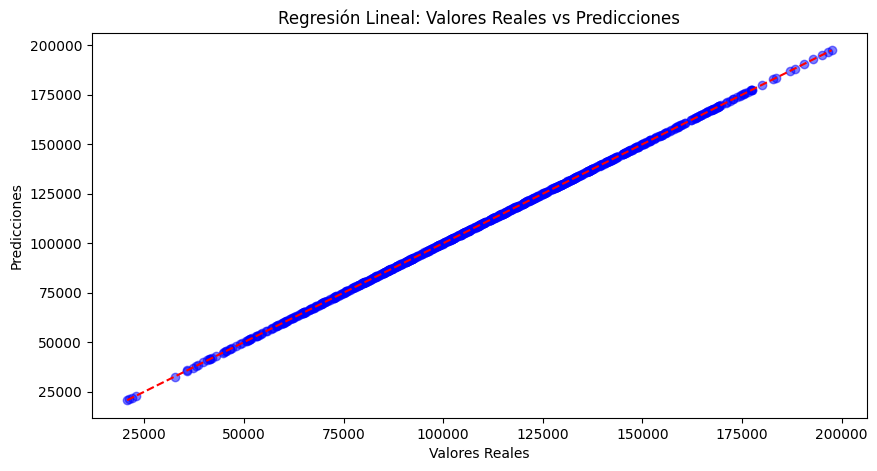

In [ ]:
# Graficar resultados de la regresión lineal
plt.figure(figsize=(10, 5))
plt.scatter(y_test2, y_pred2, alpha=0.5, color='blue')
plt.plot([y_test2.min(), y_test2.max()], [y_test2.min(), y_test2.max()], '--', color='red')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Valores Reales vs Predicciones")
plt.show()

# **Regresión Lineal 3.**

El error cuadratico medio es: 82872801.9074179, Y el coeficiente de determinación 0.9293543175986259


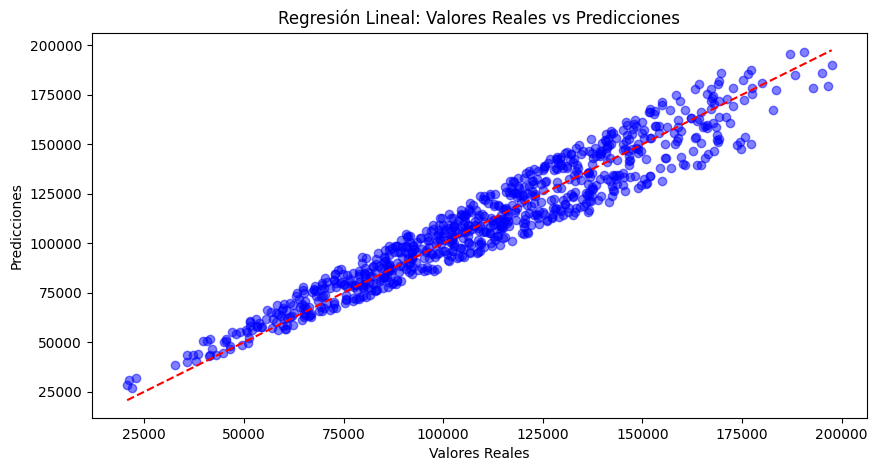

In [ ]:
features = ["TEMP MÁX (°C)", "TEMP MÍN (°C)", "PRECIPITACIONES (mm)", "VIENTO (m/s)", "NIVEL EMBALSES (%)",
    "GENERACIÓN_TOTAL", "POBLACIÓN", "ENERGÍA ACTIVA"]
target = "CONSUMO_TOTAL"

X = df[features]
y = df[target]

# División en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test3 = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred3 = model.predict(X_test)

# Evaluación del modelo
MSE = mean_squared_error(y_test3, y_pred3)
R2 = r2_score(y_test3, y_pred3)
print(f"El error cuadratico medio es: {MSE}, Y el coeficiente de determinación {R2}")

# Graficar resultados de la regresión lineal
plt.figure(figsize=(10, 5))
plt.scatter(y_test3, y_pred3, alpha=0.5, color='blue')
plt.plot([y_test3.min(), y_test3.max()], [y_test3.min(), y_test3.max()], '--', color='red')
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Valores Reales vs Predicciones")
plt.show()

Clustering con K-Means

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3987 entries, 0 to 3986
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID DEPARTAMENTO       3987 non-null   int64  
 1   ID MUNICIPIO          3987 non-null   int64  
 2   AÑO                   3987 non-null   int64  
 3   CONSUMO RESIDENCIAL   3987 non-null   float64
 4   CONSUMO INDUSTRIAL    3987 non-null   float64
 5   CONSUMO COMERCIAL     3987 non-null   float64
 6   CONSUMO PUBLICO       3987 non-null   float64
 7   ENERGÍA ACTIVA        3987 non-null   float64
 8   ENERGÍA REACTIVA      3987 non-null   float64
 9   POTENCIA MÁXIMA       3987 non-null   float64
 10  TEMP MÁX (°C)         3987 non-null   float64
 11  TEMP MÍN (°C)         3987 non-null   float64
 12  PRECIPITACIONES (mm)  3987 non-null   float64
 13  VIENTO (m/s)          3987 non-null   float64
 14  NIVEL EMBALSES (%)    3987 non-null   float64
 15  POBLACIÓN            

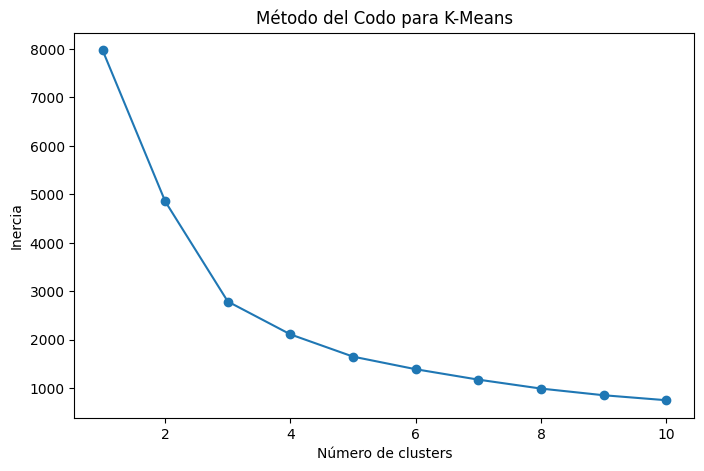

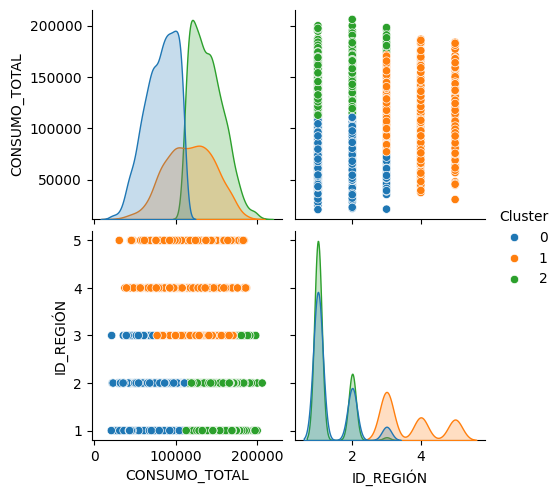

In [ ]:
# Clustering con K-Means
features = ["CONSUMO_TOTAL", "ID_REGIÓN"]

X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determinar número óptimo de clusters usando el método del codo
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.title("Método del Codo para K-Means")
plt.show()

# Entrenar K-Means con el número óptimo de clusters (ejemplo con 3)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Visualización de los clusters
sns.pairplot(df, vars=features, hue="Cluster", palette="tab10")
plt.show()

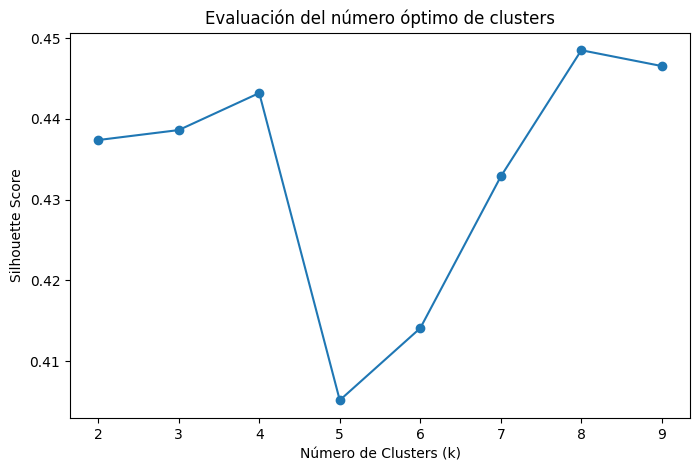

El mejor número de clusters según Silhouette Score es: 8


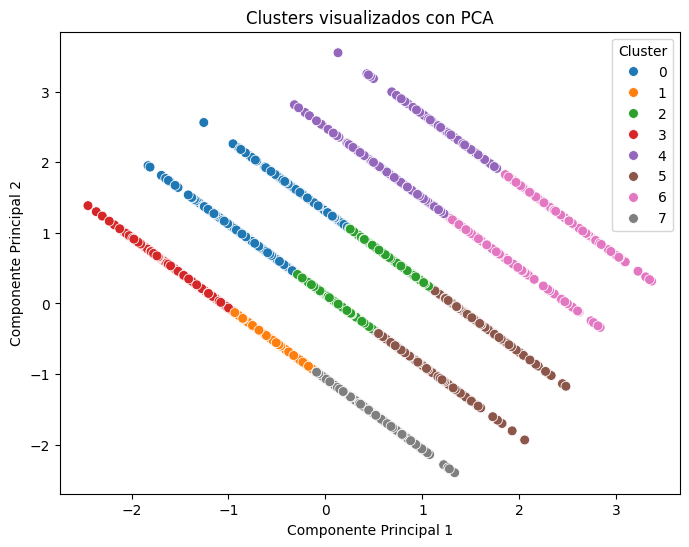

In [ ]:
X = df[features]

# Estandarización de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Evaluar el número óptimo de clusters con el Silhouette Score
silhouette_scores = []
k_range = range(2, 10)  # Probar de 2 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Graficar el Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Evaluación del número óptimo de clusters")
plt.show()

# Elegir el mejor número de clusters (el que tenga el mejor silhouette score)
best_k = k_range[np.argmax(silhouette_scores)]
print(f"El mejor número de clusters según Silhouette Score es: {best_k}")

# Aplicar K-Means con el mejor número de clusters
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(X_scaled)

# Aplicar PCA para reducir dimensiones y visualizar los clusters en 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["Cluster"] = df["Cluster"]

# Graficar clusters en 2D con PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Cluster", palette="tab10", s=50)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Clusters visualizados con PCA")
plt.legend(title="Cluster")
plt.show()